In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

# Importation, preprocessing

In [2]:
df=pd.read_csv('GSE5325_markers.csv')
df

,GATA3,XBP1,ER
0,2.254402,2.783623,1.0
1,-0.763963,-0.335917,0.0
2,2.235507,-1.029805,0.0
3,3.173195,2.618602,1.0
4,2.741764,2.523033,1.0
...,...,...,...
89,-0.759636,2.437534,0.0
90,0.778592,2.755742,0.0
91,1.833594,1.233192,0.0
92,1.441871,2.530675,1.0


# Visualisation

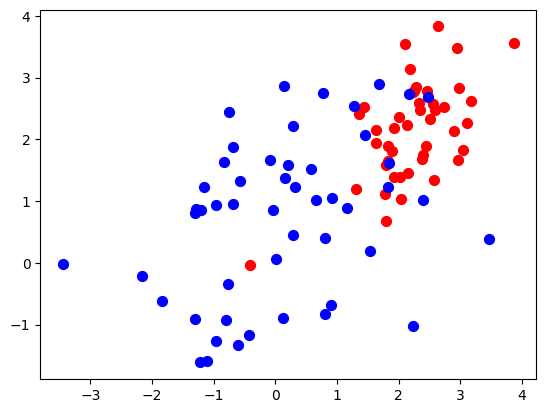

In [3]:
fig, ax = plt.subplots()
colors = ['r', 'b']
targets=[1.0,0.0]
for target, color in zip(targets,colors):
    indicesToKeep = df['ER'] == target
    x=df[indicesToKeep]['GATA3'].to_numpy()
    y=df[indicesToKeep]['XBP1'].to_numpy()
    ax.scatter(x, y, c = color, s = 50)


# Perform PCA

In [4]:
data=df.values
data_original=data[:,:2]
data_original

array([[ 2.25440220e+00,  2.78362340e+00],
       [-7.63963211e-01, -3.35916779e-01],
       [ 2.23550748e+00, -1.02980485e+00],
       [ 3.17319544e+00,  2.61860217e+00],
       [ 2.74176444e+00,  2.52303264e+00],
       [ 2.45520027e+00,  2.78966517e+00],
       [ 2.10926960e+00,  3.54280931e+00],
       [ 1.36092171e+00,  2.40383336e+00],
       [ 2.97273143e+00,  2.83986589e+00],
       [ 1.77779249e+00,  1.11840339e+00],
       [ 1.31038559e+00,  1.19180352e+00],
       [-1.31124685e+00, -9.17750578e-01],
       [ 1.68620483e+00,  2.89620083e+00],
       [ 3.86377151e+00,  3.56153519e+00],
       [ 2.63189298e+00,  3.82882480e+00],
       [ 2.19005639e+00,  3.13595222e+00],
       [ 2.04303974e-01,  1.58764707e+00],
       [-1.11121608e+00, -1.59778039e+00],
       [ 1.88375558e+00,  1.81928376e+00],
       [ 2.46711792e+00,  2.68203362e+00],
       [ 2.44883099e+00,  1.88667356e+00],
       [ 2.38731319e+00,  1.75344618e+00],
       [ 2.12601464e+00,  2.23098063e+00],
       [ 1.

In [5]:
pca = PCA(n_components=2)
pca.fit(df.values)
data_pca=pca.fit_transform(df.values[:,0:2])
data_pca

array([[-1.7550116 , -0.39031529],
       [ 2.54268601,  0.21948466],
       [ 0.60078578,  2.60848626],
       [-2.37902757,  0.30395921],
       [-1.97978133,  0.11456891],
       [-1.91723455, -0.27182445],
       [-2.10646885, -1.07872252],
       [-0.81654442, -0.63896609],
       [-2.35660031,  0.00623371],
       [-0.35656687,  0.63167631],
       [-0.03264291,  0.28681394],
       [ 3.33188315,  0.34284516],
       [-1.3755706 , -0.82797551],
       [-3.50300433, -0.01650019],
       [-2.69460995, -0.9836956 ],
       [-1.9204935 , -0.70794987],
       [ 0.59753163, -0.70464393],
       [ 3.5914125 ,  1.00246427],
       [-0.87045334,  0.14343235],
       [-1.86057273, -0.17954217],
       [-1.35790308,  0.43710624],
       [-1.22755772,  0.50451588],
       [-1.31441876, -0.03285852],
       [ 0.76843584, -0.56874267],
       [-0.12730498, -1.75362231],
       [-0.65095776,  0.27829745],
       [ 1.43444107,  1.51338889],
       [ 3.684025  ,  0.9519332 ],
       [-0.71009284,

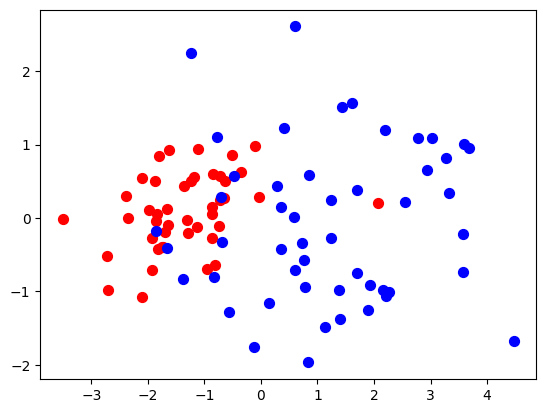

In [6]:
fig, ax = plt.subplots()
colors = ['r', 'b']
targets=[1.0,0.0]
for target, color in zip(targets,colors):
    indicesToKeep = df['ER'] == target
    x=data_pca[indicesToKeep,0]
    y=data_pca[indicesToKeep,1]
    ax.scatter(x, y, c = color, s = 50)

In [7]:
pca.explained_variance_ratio_

array([0.81803878, 0.18196122])

# We visualize only Principal Component 1

Text(-5, 3, 'ER-')

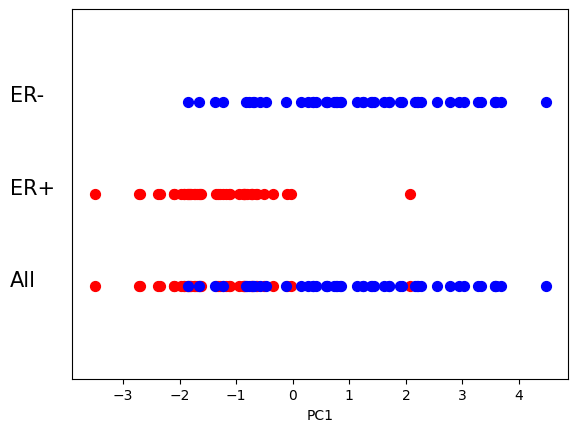

In [8]:
fig, ax = plt.subplots()
colors = ['r', 'b']
targets=[1.0,0.0]
for target, color in zip(targets,colors):
    indicesToKeep = df['ER'] == target
    x=data_pca[indicesToKeep,0]
    y=np.ones(len(x))
    ax.scatter(x, y, c = color, s = 50)

indicesToKeep = df['ER'] == 1.0
x=data_pca[indicesToKeep,0]
y=2*np.ones(len(x))
ax.scatter(x, y, c = 'r', s = 50)

indicesToKeep = df['ER'] == 0.0
x=data_pca[indicesToKeep,0]
y=3*np.ones(len(x))
ax.scatter(x, y, c = 'b', s = 50)

ax.set_ylim(ymin=0, ymax=4)
plt.yticks([])
plt.xlabel('PC1')
ax.text(-5, 1, r'All', fontsize = 15)
ax.text(-5, 2, r'ER+', fontsize = 15)
ax.text(-5, 3, r'ER-', fontsize = 15)

# Horseshoe effect

In [9]:
genes=np.array([[2,0,0,0,0,0,0,0,0,0],
                [4,2,0,0,0,0,0,0,0,0],
                [2,4,2,0,0,0,0,0,0,0], 
                [0,2,4,2,0,0,0,0,0,0],
                [0,0,2,4,2,0,0,0,0,0],
                 [0,0,0,2,4,2,0,0,0,0],   
                 [0,0,0,0,2,4,2,0,0,0],    
                 [0,0,0,0,0,2,4,2,0,0],   
                 [0,0,0,0,0,0,2,4,2,0],  
                 [0,0,0,0,0,0,0,2,4,2],
               [0,0,0,0,0,0,0,0,2,4],
                [0,0,0,0,0,0,0,0,0,2]])

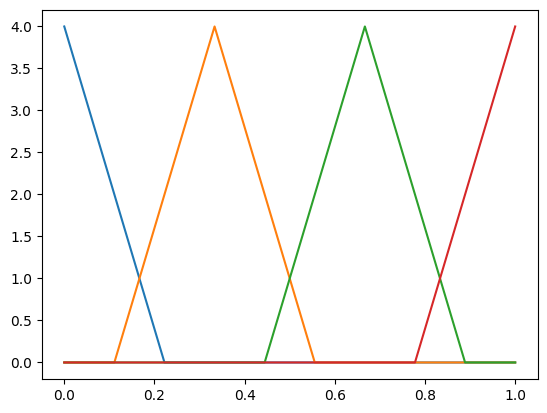

In [10]:
fig, ax = plt.subplots()
t=np.linspace(0, 1,10)

for color in range(4):
    x=genes[3*color+1,:]
    plt.plot(t, x)

In [11]:
pca = PCA(n_components=2)
pca.fit(genes)
genes_pca=pca.fit_transform(genes)
genes_pca

array([[-0.51417934, -0.82968323],
       [-1.80854039, -1.95078175],
       [-2.90245631, -2.00485395],
       [-3.05904312, -0.40498598],
       [-2.30490101,  1.81229288],
       [-0.85395315,  3.37801203],
       [ 0.85395315,  3.37801203],
       [ 2.30490101,  1.81229288],
       [ 3.05904312, -0.40498598],
       [ 2.90245631, -2.00485395],
       [ 1.80854039, -1.95078175],
       [ 0.51417934, -0.82968323]])

Text(0, 0.5, 'PC2')

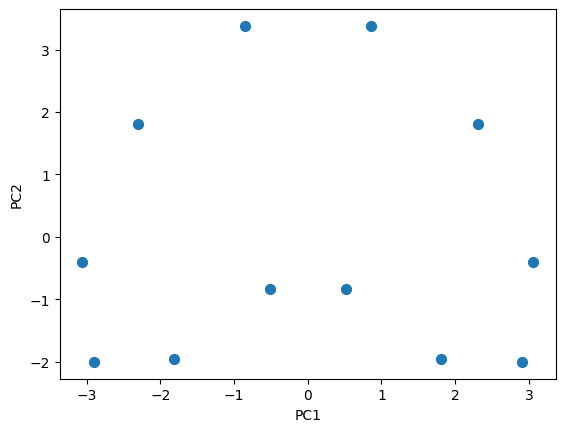

In [12]:
fig, ax = plt.subplots()
x=genes_pca[:,0]
y=genes_pca[:,1]
ax.scatter(x, y, s = 50)
plt.xlabel('PC1')
plt.ylabel('PC2')